In [1]:
import os

import pandas as pd
import matplotlib
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"

from src.analysis import spikes, tuning

%load_ext autoreload
%autoreload 2

In [2]:
dark_blue = "#1f78b4"
dark_green = "#33a02c"
dark_red = "#e31a1c"
dark_pink = "deeppink"

In [3]:
root = os.path.expanduser("~/PycharmProjects/SpikeToExcite")
model_root = f"{root}/data"
model_id = "prediction_0.0017782794100389228_0.3_0.1_0_17_0.2_0.5"

In [4]:
def plot(y_lim, x_lim, x_label, y_label, fs, ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=3, labelsize=fs, pad=8)
    ax.yaxis.set_tick_params(width=3, labelsize=fs, pad=8)
    ax.set_ylim(y_lim)
    ax.set_xlim(x_lim)
    ax.set_xlabel(x_label, fontsize=fs, labelpad=4)
    ax.set_ylabel(y_label, fontsize=fs, labelpad=4)

## Spike statistics

In [5]:
spike_analysis = spikes.SpikeAnalysis(root, model_id)

In [6]:
monkey_firing_x, monkey_firing_y = spikes.get_monkey_firing_rates(root)
prov_seizure_model_x, prov_seizure_model_y = spike_analysis.seizure_model_provocative_clips_spike_stats.get_firing_rate(max_rate=120)
nonprov_seizure_model_x, nonprov_seizure_model_y = spike_analysis.seizure_model_nonprovocative_clips_spike_stats.get_firing_rate(max_rate=120)
prov_control_model_x, prov_control_model_y = spike_analysis.control_model_provocative_clips_spike_stats.get_firing_rate(max_rate=120)
nonprov_control_model_x, nonprov_control_model_y = spike_analysis.control_model_nonprovocative_clips_spike_stats.get_firing_rate(max_rate=120)

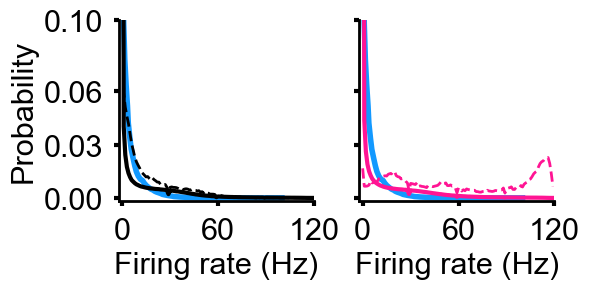

In [7]:
def plot_firing(monkey_x, monkey_y, prov_model_x, prov_model_y, nonprov_model_x, nonprov_model_y, c, ax):
    ax.plot(monkey_x, 10**monkey_y, linewidth=4, label="Monkey V1", c="#1399ff")
    ax.plot(prov_model_x, prov_model_y, linewidth=2, label="Model", c=c, ls="--")
    ax.plot(nonprov_model_x, nonprov_model_y, linewidth=3, label="Model", c=c)
    plot([-0.002, 0.1], [-2, 120], "Firing rate (Hz)", "Probability", 22, ax)
    ax.set_xticks([0, 60, 120])
    ax.set_yticks([0, 0.03, 0.06, 0.1])
    
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plot_firing(monkey_firing_x, monkey_firing_y, prov_control_model_x, prov_control_model_y, nonprov_control_model_x, nonprov_control_model_y, "black", ax[0])
plot_firing(monkey_firing_x, monkey_firing_y, prov_seizure_model_x, prov_seizure_model_y, nonprov_seizure_model_x, nonprov_seizure_model_y, dark_pink, ax[1])
# leg = ax[1].legend(loc=(0.05, 0.75), fontsize=14, frameon=False)
# new_labels = ["Monkey V1", "Seizure model (provocative input)", "Seizure model (non-provocative input)"]
# for i, text in enumerate(leg.get_texts()):
#     text.set_text(new_labels[i])
ax[1].set_ylabel("")
ax[1].set_yticklabels([])
fig.tight_layout()
plt.savefig(f"{root}/figures/fig3/firing_rate.svg", format="svg", transparent=False, bbox_inches="tight")

In [8]:
monkey_sync_x, monkey_sync_y = spikes.get_monkey_synchronization(root)

In [9]:
sync_prov_seizure_model_x, sync_prov_seizure_model_y = spike_analysis.seizure_model_provocative_clips_spike_stats.get_synchronization()
sync_nonprov_seizure_model_x, sync_nonprov_seizure_model_y = spike_analysis.seizure_model_nonprovocative_clips_spike_stats.get_synchronization()
sync_prov_control_model_x, sync_prov_control_model_y = spike_analysis.control_model_provocative_clips_spike_stats.get_synchronization()
sync_nonprov_control_model_x, sync_nonprov_control_model_y = spike_analysis.control_model_nonprovocative_clips_spike_stats.get_synchronization()

In [10]:
sync_prov_seizure_model_y.max(), sync_nonprov_seizure_model_y.mean()

(0.6285014129601992, 0.03766016765837154)

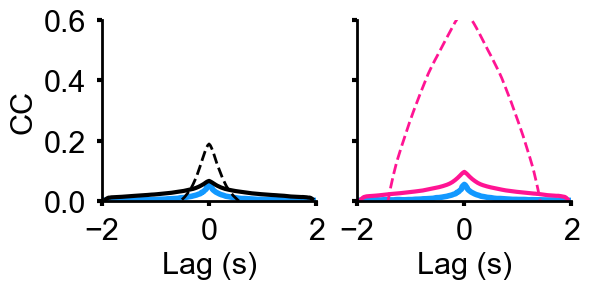

In [11]:
def plot_sync(monkey_x, monkey_y, prov_model_x, prov_model_y, nonprov_model_x, nonprov_model_y, c, ax):
    ax.plot(monkey_x, monkey_y, linewidth=4, label="Monkey V1", c="#1399ff")
    ax.plot(prov_model_x, prov_model_y, linewidth=2, label="Model", c=c, ls="--")
    ax.plot(nonprov_model_x, nonprov_model_y, linewidth=3, label="Model", c=c)
    plot([0, 0.6], [-2, 2], "Lag (s)", "CC", 22, ax)
    ax.set_yticks([0, 0.2, 0.4, 0.6])    
    
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plot_sync(monkey_sync_x, monkey_sync_y, sync_prov_control_model_x, sync_prov_control_model_y, sync_nonprov_control_model_x, sync_nonprov_control_model_y, "black", ax[0])
plot_sync(monkey_sync_x, monkey_sync_y, sync_prov_seizure_model_x, sync_prov_seizure_model_y, sync_nonprov_seizure_model_x, sync_nonprov_seizure_model_y, dark_pink, ax[1])
ax[1].set_ylabel("")
ax[1].set_yticklabels([])
fig.tight_layout()
plt.savefig(f"{root}/figures/fig3/cross_correlogram.svg", format="svg", transparent=False, bbox_inches="tight")

## Tuning properties

In [12]:
grating_analysis = tuning.GratingAnalysis(root, model_id)
control_model_response, seizure_model_response = grating_analysis.get_mean_responses_to_gratings()

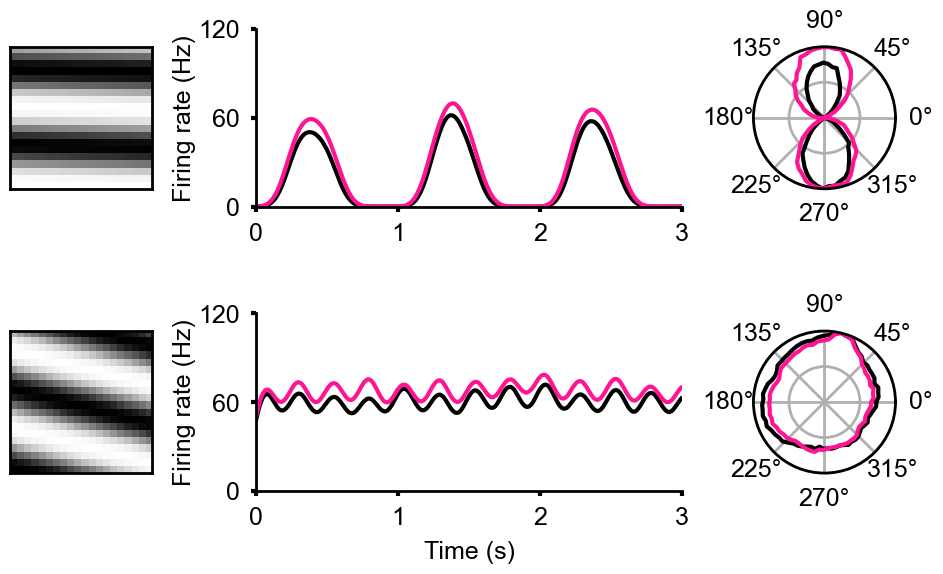

In [13]:
def plot_optimal_grating(unit_idx, ax):
    grating = grating_analysis.control_grating_query.query._gratings[unit_idx, 1]
    ax.imshow(grating, vmin=-grating.abs().max(), vmax=grating.abs().max(), cmap="Greys")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    
def plot_firing_rate(unit_idx, time_label, ax):
    ax.plot(120*grating_analysis.control_grating_query.query._responses[unit_idx], linewidth=3, c="black")
    ax.plot(120*grating_analysis.seizure_grating_query.query._responses[unit_idx], linewidth=3, c=dark_pink)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    fs = 18
    ax.xaxis.set_tick_params(width=3, labelsize=fs, pad=8)
    ax.yaxis.set_tick_params(width=3, labelsize=fs, pad=8)
    ax.set_xlim([0, 360])
    ax.set_xticks([0, 120, 240, 360])
    ax.set_xticklabels([0, 1, 2, 3])
    ax.set_ylim([0, 120])
    ax.set_yticks([0, 60, 120])
    if time_label:
        ax.set_xlabel("Time (s)", fontsize=fs, labelpad=8)
    else:
        ax.set_xlabel("", fontsize=fs, labelpad=8)
    ax.set_ylabel("Firing rate (Hz)", fontsize=fs, labelpad=2)
    
def plot_orientation_tuning(unit_idx, ax):
    theta, tuning_curve = grating_analysis.control_grating_query.query.orientation_tuning_curve(unit_idx)
    ax.plot(theta, tuning_curve/tuning_curve.max(), linewidth=3, c="black")
    theta, tuning_curve = grating_analysis.seizure_grating_query.query.orientation_tuning_curve(unit_idx)
    ax.plot(theta, tuning_curve/tuning_curve.max(), linewidth=3, c=dark_pink)
    ax.set_rmax(1)
    ax.grid(linewidth=2)
    ax.spines["polar"].set_linewidth(2)
    ax.set_yticklabels([])
    labelsize = 18
    ax.xaxis.set_tick_params(width=3, labelsize=labelsize, pad=8)
    ax.yaxis.set_tick_params(width=3, labelsize=13)
    
def plot_qualitative(unit_idx, fig, time_label, fig_spec):
    gs = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=fig_spec, wspace=0.3, width_ratios=[1, 3, 1])   
    
    # Second subplot
    ax2 = plt.subplot(gs[0])
    plot_optimal_grating(unit_idx, ax2)
    
    pos1 = ax2.get_position() # get the original position 
    pos2 = [pos1.x0 - 0.03, pos1.y0,  pos1.width, pos1.height] 
    ax2.set_position(pos2) # set a new position
    
    # Third subplot with a longer width
    ax3 = plt.subplot(gs[1])
    plot_firing_rate(unit_idx, time_label, ax3)
    
    # Fifth subplot (polar plot)
    ax5 = plt.subplot(gs[2], polar=True)
    plot_orientation_tuning(unit_idx, ax5)
    
fig = plt.figure(figsize=(11, 6))
fig_spec = gridspec.GridSpec(2, 1, wspace=0., hspace=0.6)

plot_qualitative(117, fig, False, fig_spec[0])
plot_qualitative(50, fig, True, fig_spec[1])
plt.savefig(f"{root}/figures/fig3/qual_tuning.svg", format="svg", transparent=False, bbox_inches="tight")

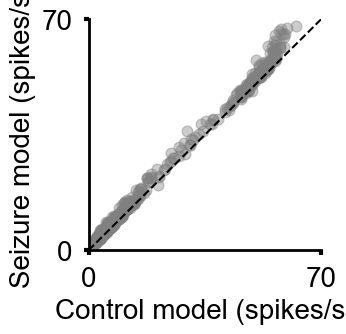

In [14]:
def plot_mean_response_comparison(control_model_response, seizure_model_response, ax):
    x_min, x_max = 0, 0.6
    y_min, y_max = x_min, x_max
    plot(y_lim=(y_min, y_max), x_lim=(x_min, x_max), x_label="Control model (spikes/s)", y_label="Seizure model (spikes/s)", fs=20, ax=ax)
    
    ax.scatter(control_model_response, seizure_model_response, c="gray", s=60, alpha=0.4)
    plt.plot([0, 0.6], [0, 0.6], linestyle="--", c="black")
    ax.set_xticks([0, 0.6])
    ax.set_yticks([0, 0.6])
    ax.set_xticklabels(["0", "70"])
    ax.set_yticklabels(["0", "70"])

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_mean_response_comparison(control_model_response, seizure_model_response, ax)
plt.savefig(f"{root}/figures/fig3/quant_response.svg", format="svg", transparent=False, bbox_inches="tight")

/tmp/ipykernel_3838714/3214218732.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_3838714/3214218732.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


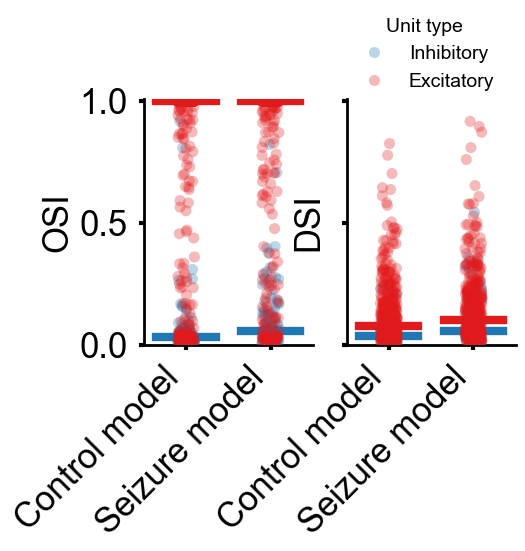

In [15]:
def plot_tuning(tuning_df, metric, ax):
    plot(y_lim=(0, 1.01), x_lim=(0, 1), x_label="", y_label=metric, fs=25, ax=ax)
    sns.stripplot(tuning_df, x="model", y=metric, hue="ex", palette=[dark_blue, dark_red], alpha=0.3, s=8, ax=ax)
    sns.barplot(
        tuning_df[tuning_df["ex"]==True], x="model", y=metric,
        estimator="median",
        errorbar=None,
        edgecolor=dark_red,
        ax=ax
    )
    ax = sns.barplot(
        tuning_df[tuning_df["ex"]==False], x="model", y=metric,
        estimator="median",
        errorbar=None,
        edgecolor=dark_blue,
        ax=ax
    )
    for bar in ax.patches:
        facecolor = bar.get_edgecolor()
        bar.set_facecolor("None")
        bar.set_edgecolor("None")
        c=0.05
        ax.plot([bar.get_x()+c, bar.get_x() + bar.get_width()-c], [bar.get_height(), bar.get_height()], color=facecolor, linewidth=6)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_xlabel("")
    
fig, ax = plt.subplots(1, 2, figsize=(6*0.8, 4*0.8))
plot_tuning(grating_analysis.tuning_df, "OSI", ax[0])
plot_tuning(grating_analysis.tuning_df, "DSI", ax[1])
ax[0].get_legend().remove()
leg = ax[1].legend(loc=(0, 1), fontsize=14, frameon=False)
new_labels = ["Inhibitory", "Excitatory"]
for i, text in enumerate(leg.get_texts()):
    text.set_text(new_labels[i])
leg.set_title("Unit type")
leg.get_title().set_fontsize(14)
ax[1].set_yticklabels([])
plt.savefig(f"{root}/figures/fig3/quant_tuning.svg", format="svg", transparent=False, bbox_inches="tight")

## Supplementary

In [16]:
spike_analysis_NS = spikes.SpikeAnalysis(root, model_id, dataset_name="natural")

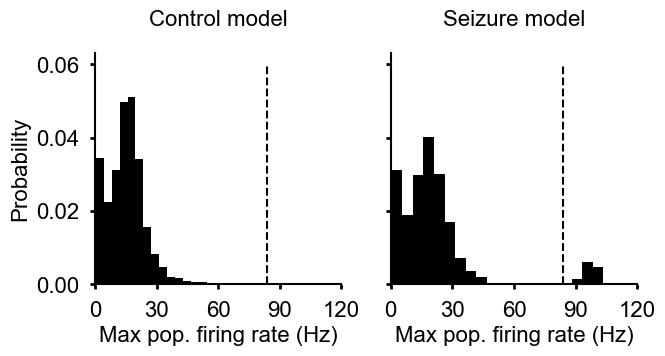

In [17]:
def plot_mean_pop_fr(spike_tensor, ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    fs = 16
    ax.xaxis.set_tick_params(width=2, labelsize=fs, pad=8)
    ax.yaxis.set_tick_params(width=2, labelsize=fs, pad=8)
    ax.set_xlim([0, 12])
    ax.set_xticks([0, 30, 60, 90, 120])
    pd.Series(spike_tensor.mean(1).amax(1)*120).hist(density=True, bins=20, color="black", ax=ax)
    ax.grid(False)
    ax.set_xlabel("Max pop. firing rate (Hz)", fontsize=fs, labelpad=4)
    
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7, 3))
plot_mean_pop_fr(spike_analysis_NS.control_spike_tensor_builder.spike_tensor, axs[0])
plot_mean_pop_fr(spike_analysis_NS.seizure_spike_tensor_builder.spike_tensor, axs[1])
axs[0].plot([84, 84], [0, 0.06], "--", c="black")
axs[1].plot([84, 84], [0, 0.06], "--", c="black")
axs[0].set_title("Control model", fontsize=16, pad=20)
axs[1].set_title("Seizure model", fontsize=16, pad=20)
axs[0].set_ylabel("Probability", fontsize=16, labelpad=4)
plt.savefig(f"{root}/figures/supp/pop_fr_dist.svg", format="svg", transparent=False, bbox_inches="tight")

In [18]:
grating_analysis.print_stats_table()

\begin{tabular}{lllll}
\toprule
 &  & Control model & Seizure model & p-value \\
metric & Unit type &  &  &  \\
\midrule
\multirow[t]{2}{*}{OSI} & Excitatory & $0.82 \pm 0.35$ & $0.81 \pm 0.35$ & $0.4709$ \\
 & Inhibitory & $0.09 \pm 0.19$ & $0.13 \pm 0.19$ & $0.0010$ \\
\cline{1-5}
\multirow[t]{2}{*}{DSI} & Excitatory & $0.12 \pm 0.13$ & $0.15 \pm 0.14$ & $0.0008$ \\
 & Inhibitory & $0.05 \pm 0.04$ & $0.10 \pm 0.10$ & $0.0002$ \\
\cline{1-5}
\bottomrule
\end{tabular}

